# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = len(merge_df["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicates


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = merge_df[merge_df["Mouse ID"] != "g989"]
clean_merge_df 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_merge_df["Mouse ID"].unique()
clean_total_mice = len(unique_mice)
clean_total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_vol = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_var = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_std = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#create a dictionary
summary = {"Mean Tumor Volume":mean_tumor_vol, 
            "Median Tumor Volume":median_tumor_vol,
            "Tumor Volume Variance":tumor_vol_var,
            "Tumor Volume Std. Dev.":tumor_vol_std,
            "Tumor Volume Std. Err.":tumor_vol_sem}

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(summary)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='#Observed Mouse Timepoints'>

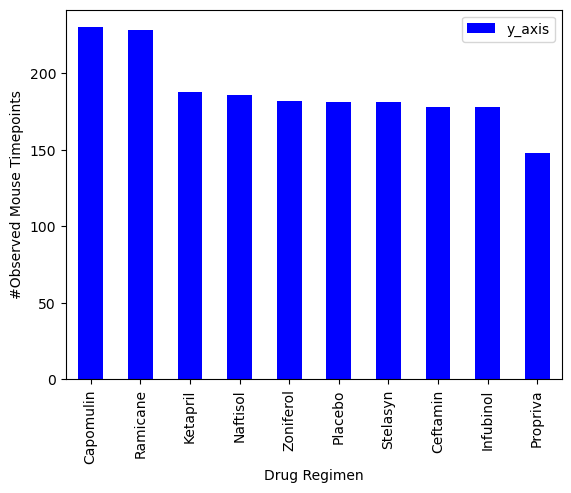

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar1 = pd.DataFrame(
    dict(y_axis=clean_merge_df.groupby("Drug Regimen").count()["Mouse ID"]
    )
)

bar1_sorted = bar1.sort_values('y_axis', ascending=False)

bar1_sorted.plot.bar(xlabel="Drug Regimen", ylabel="#Observed Mouse Timepoints", color="b", rot=90)


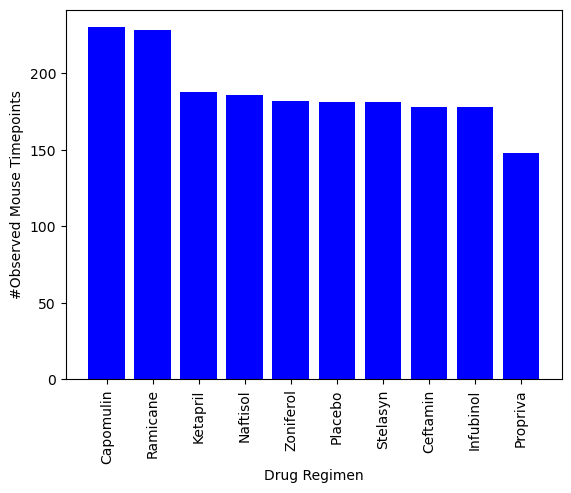

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar2 = pd.DataFrame(
    dict(y_axis=clean_merge_df.groupby("Drug Regimen").count()["Mouse ID"]
    )
)

bar2_sorted = bar2.sort_values('y_axis', ascending=False)

x_values=list(bar2_sorted.index)
y_values=list(bar2_sorted["y_axis"])

plt.bar(x_values, y_values, color="b", align="center")

tick_drugs = [value for value in x_values]
plt.xticks(tick_drugs, x_values, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("#Observed Mouse Timepoints")
plt.show()



<Axes: ylabel='y_axis'>

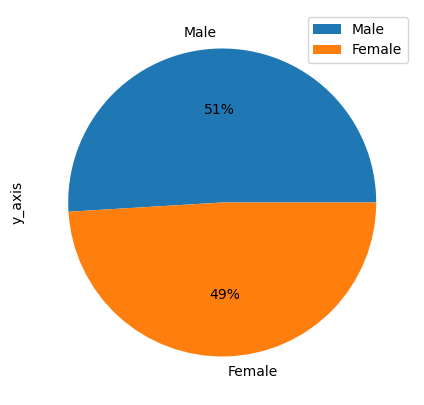

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie1 = pd.DataFrame(
    dict(y_axis=clean_merge_df.groupby("Sex").count()["Mouse ID"]
    )
)

pie1_sorted = pie1.sort_values('y_axis', ascending=False)

pie1_sorted.plot(kind="pie", y="y_axis", figsize=(5,5), autopct='%1.0f%%')

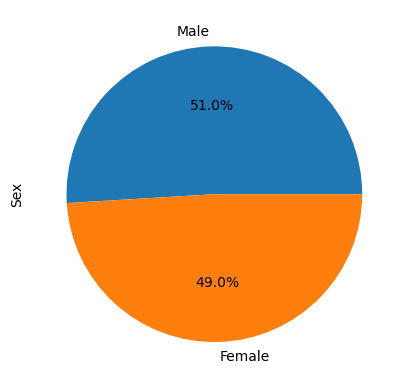

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = pd.DataFrame(
    dict(y_axis=clean_merge_df.groupby("Sex").count()["Mouse ID"]
    )
)

pie2_sorted = pie2.sort_values('y_axis', ascending=False)

x_values=list(pie2_sorted.index)
y_values=list(pie2_sorted["y_axis"])

plt.pie(y_values, labels=x_values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_merge_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint
 
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(max_timepoint, clean_merge_df, how="inner", on=["Mouse ID","Timepoint"])
max_timepoint_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = max_timepoint_df["Tumor Volume (mm3)"]
Capomulin_data = []
Ramicane_data = []
Infubinol_data = []
Ceftamin_data = []

tumor_vol_df = pd.DataFrame([Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq
lower_bound = lowerq - (1.5 * IQR)
upper_bound = upperq + (1.5 * IQR)

print(f"lower: {lower_bound}")
print(f"upper: {upper_bound}")
max_timepoint_df.describe()

    # Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(len(max_timepoint_df)):
    if max_timepoint_df.loc[i,"Drug Regimen"] == treatments[0]:
        Capomulin_data.append(max_timepoint_df.loc[i,"Tumor Volume (mm3)"])
        
for i in range(len(max_timepoint_df)):
    if max_timepoint_df.loc[i,"Drug Regimen"] == treatments[1]:
        Ramicane_data.append(max_timepoint_df.loc[i,"Tumor Volume (mm3)"])
        
for i in range(len(max_timepoint_df)):
    if max_timepoint_df.loc[i,"Drug Regimen"] == treatments[2]:
        Infubinol_data.append(max_timepoint_df.loc[i,"Tumor Volume (mm3)"])
        
for i in range(len(max_timepoint_df)):
    if max_timepoint_df.loc[i,"Drug Regimen"] == treatments[3]:
        Ceftamin_data.append(max_timepoint_df.loc[i,"Tumor Volume (mm3)"])
        
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
#Capomulin_quartiles = Capomulin_data.quantile([.25,.5,.75])
#Capomulin_lowerq = Capomulin_quartiles[0.25]
#Capomulin_upperq = Capomulin_quartiles[0.75]
#Capomulin_IQR = Capomulin_upperq-Capomulin_lowerq
#Capomulin_lower_bound = Capomulin_lowerq - (1.5 * Capomulin_IQR)
#Capomulin_upper_bound = Capomulin_upperq + (1.5 * Capomulin_IQR)

#Ramicane_quartiles = Ramicane_data.quantile([.25,.5,.75])
#Ramicane_lowerq = Ramicane_quartiles[0.25]
#Ramicane_upperq = Ramicane_quartiles[0.75]
#Ramicane_IQR = Ramicane_upperq-Ramicane_lowerq
#Ramicane_lower_bound = Ramicane_lowerq - (1.5 * Ramicane_IQR)
#Ramicane_upper_bound = Ramicane_upperq + (1.5 * Ramicane_IQR)

#Infubinol_quartiles = Infubinol_data.quantile([.25,.5,.75])
#Infubinol_lowerq = Infubinol_quartiles[0.25]
#Infubinol_upperq = Infubinol_quartiles[0.75]
#Infubinol_IQR = Infubinol_upperq-Infubinol_lowerq
#Infubinol_lower_bound = Infubinol_lowerq - (1.5 * Infubinol_IQR)
#Infubinol_upper_bound = Infubinol_upperq + (1.5 * Infubinol_IQR)

#Ceftamin_quartiles = Ceftamin_data.quantile([.25,.5,.75])
#Ceftamin_lowerq = Ceftamin_quartiles[0.25]
#Ceftamin_upperq = Ceftamin_quartiles[0.75]
#Ceftamin_IQR = Ceftamin_upperq-Ceftamin_lowerq
#Ceftamin_lower_bound = Ceftamin_lowerq - (1.5 * Ceftamin_IQR)
#Ceftamin_upper_bound = Ceftamin_upperq + (1.5 * Ceftamin_IQR)

lower: 17.10923096124998
upper: 93.82025999125003


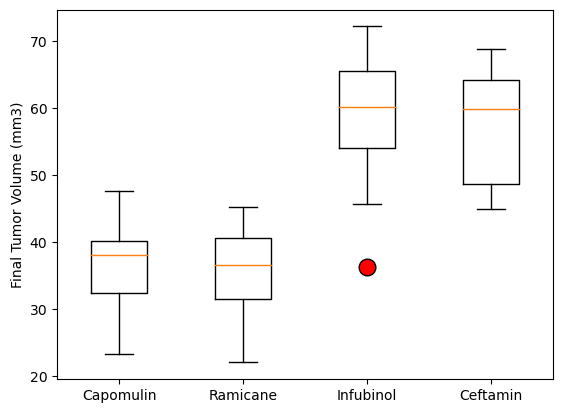

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

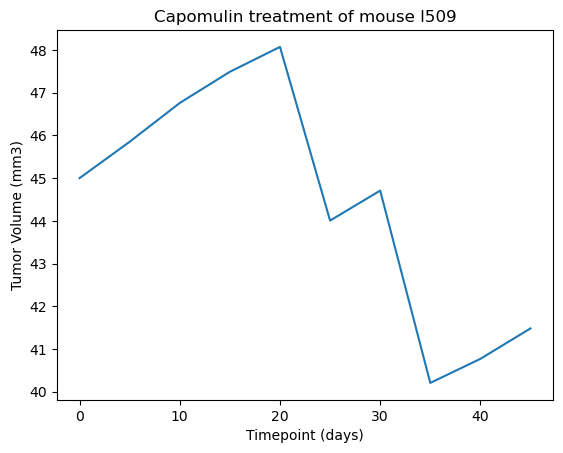

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


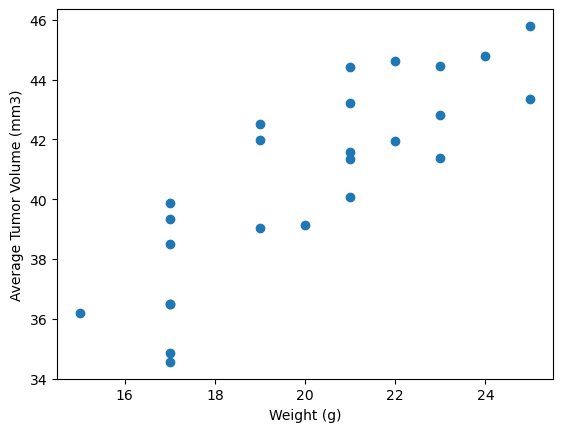

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


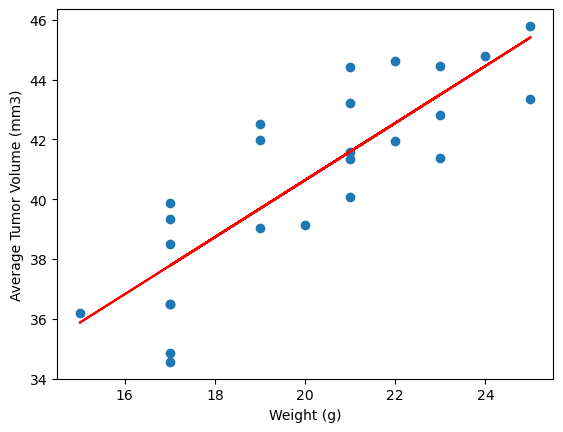

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
